In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from collections import defaultdict
import matplotlib.pyplot as plt


In [2]:
# Dynamic letter indices to exclude
dynamic_indices = {7, 9, 20, 23, 25}  # H, J, U, X, Z

ngt_all_keypoint = Path('../data/dataset/ngt_keypoint.csv')
ngt_static_keypoint = Path('../data/dataset/ngt_static_keypoint.csv')

# Filter out dynamic letters
static_count = 0
dynamic_count = 0

with open(ngt_all_keypoint, 'r', encoding='utf-8') as infile, \
     open(ngt_static_keypoint, 'w', newline='', encoding='utf-8') as outfile:
    
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    
    for row in reader:
        if row:
            label_idx = int(row[0])
            if label_idx not in dynamic_indices:
                writer.writerow(row)
                static_count += 1
            else:
                dynamic_count += 1

print(f"Static samples written: {static_count}")
print(f"Dynamic samples filtered out: {dynamic_count}")
print(f"Output: {ngt_static_keypoint}")

Static samples written: 42909
Dynamic samples filtered out: 9695
Output: ../data/dataset/ngt_static_keypoint.csv


## Verify Labels Match Poses

Need to verify that each index (0:A, 1:B..25:Z) match as expected.

In [3]:
# Load alphabet
with open('../data/dataset/keypoint_classifier_label.csv', 'r', encoding='utf-8-sig') as f:
    ALL_LETTERS = [row[0] for row in csv.reader(f)]

# Sample one row per static letter
ngt_static_keypoint = Path('../data/dataset/ngt_static_keypoint.csv')
static_samples = {}

with open(ngt_static_keypoint, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if row:
            label_idx = int(row[0])
            if label_idx not in static_samples:
                landmarks = [float(x) for x in row[1:]]
                static_samples[label_idx] = landmarks

# Convert to (x, y) coordinate pairs
def landmarks_to_points(landmarks):
    """Convert 42-element flat list to 21 (x,y) points"""
    return [(landmarks[i], landmarks[i+1]) for i in range(0, 42, 2)]

print(f"Found {len(static_samples)} unique static letter labels")
print(f"Labels: {sorted(static_samples.keys())}")
print(f"Letters: {[ALL_LETTERS[idx] for idx in sorted(static_samples.keys())]}")

Found 21 unique static letter labels
Labels: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24]
Letters: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']


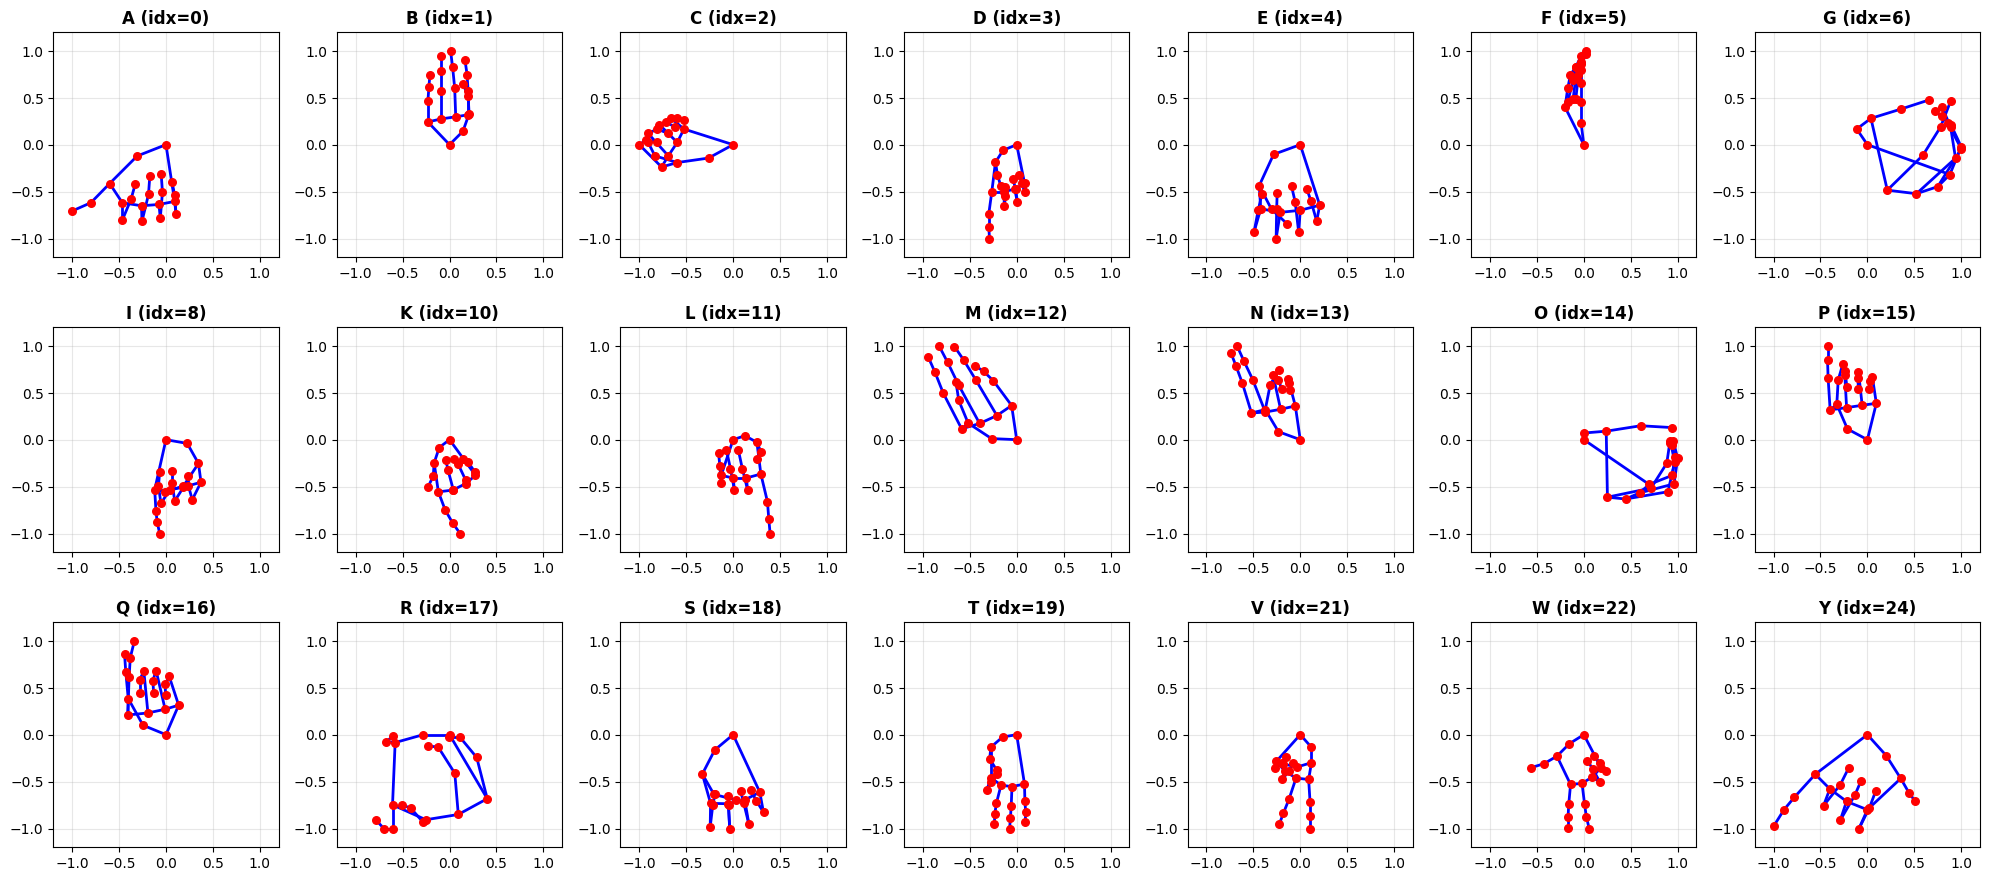

In [5]:

# Hand skeleton connections (same as your draw_landmarks function)
HAND_CONNECTIONS = [
    # Thumb
    (2, 3), (3, 4),
    # Index
    (5, 6), (6, 7), (7, 8),
    # Middle
    (9, 10), (10, 11), (11, 12),
    # Ring
    (13, 14), (14, 15), (15, 16),
    # Pinky
    (17, 18), (18, 19), (19, 20),
    # Palm
    (0, 1), (1, 2), (2, 5), (5, 9), (9, 13), (13, 17), (17, 0)
]

# Create grid of subplots
static_indices = sorted(static_samples.keys())
n_letters = len(static_indices)
cols = 7
rows = (n_letters + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

for idx, label_idx in enumerate(static_indices):
    ax = axes[idx]
    letter = ALL_LETTERS[label_idx]
    
    # Get landmarks and convert to points
    landmarks = static_samples[label_idx]
    points = landmarks_to_points(landmarks)
    
    # Draw connections
    for start, end in HAND_CONNECTIONS:
        x_vals = [points[start][0], points[end][0]]
        y_vals = [points[start][1], points[end][1]]
        ax.plot(x_vals, y_vals, 'b-', linewidth=2)
    
    # Draw points
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    ax.scatter(x_coords, y_coords, c='red', s=30, zorder=3)
    
    # Format
    ax.set_aspect('equal')
    ax.invert_yaxis()  # Flip Y to match image coordinates
    ax.set_title(f'{letter} (idx={label_idx})', fontsize=12, fontweight='bold')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.grid(True, alpha=0.3)

# Hide empty subplots
for idx in range(n_letters, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()